In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


In [3]:
iris=pd.read_csv('iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species1']= label_encoder.fit_transform(iris['Species'])

In [ ]:
iris['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [ ]:
iris['Species1']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species1, Length: 150, dtype: int64

In [ ]:
#Setosa = 0
#Versicolor = 1
#Virginica = 2

In [ ]:
iris['Species1'].value_counts()

In [ ]:
iris

In [ ]:
x=iris.iloc[:,0:4]
y=iris['Species1']

In [ ]:
colnames = list(iris.columns)
colnames

['Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Species',
 'Species1']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Total Data has 150 Observations
- Test Size = 0.2 = 20% = 30 Observations that are randomly selected
- Train Size = 0.8 = 80% = 120 Observations that are balance data which was not selected

4 Objects are created
- x_train - independent variables of the training dataset
- x_test - independent variables of the testing dataset
- y_train - dependent variable labels of the training dataset
- y_test - dependent variable labels of the testing dataset

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### Building Decision Tree Classifier using Entropy Criteria

- max_depth = maximum times that the data should be divided
- min_samples = minimum number of observations that MUST be in the TERMINAL NODES at any point. If a further split drops the number of obs below the min_samples criteria, DO NOT split further.
- max_samples = maximum number of observations that MUST be in the TERMINAL NODES at any point. If a further split exceeds the number of obs above the max_samples criteria, continue splitting until the max-limit is not breached.

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

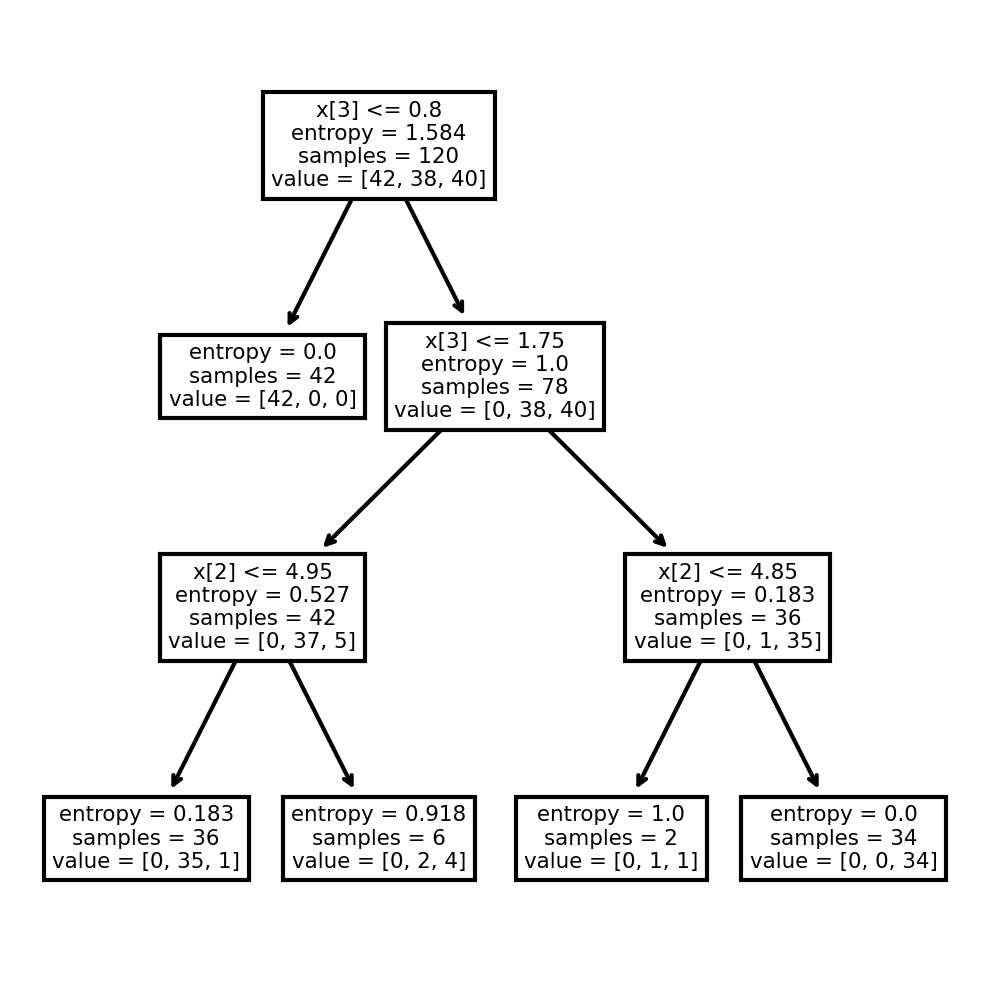

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#Plot the decision tree
tree.plot_tree(model);

#X[0]='Sepal.Length',
#X[1]='Sepal.Width',
#X[2]='Petal.Length',
#X[3]='Petal.Width',
# 0 = Setosa
# 1 = Versicolor
# 2 = Virginica

#[Setosa,Versicolor,Virginica]

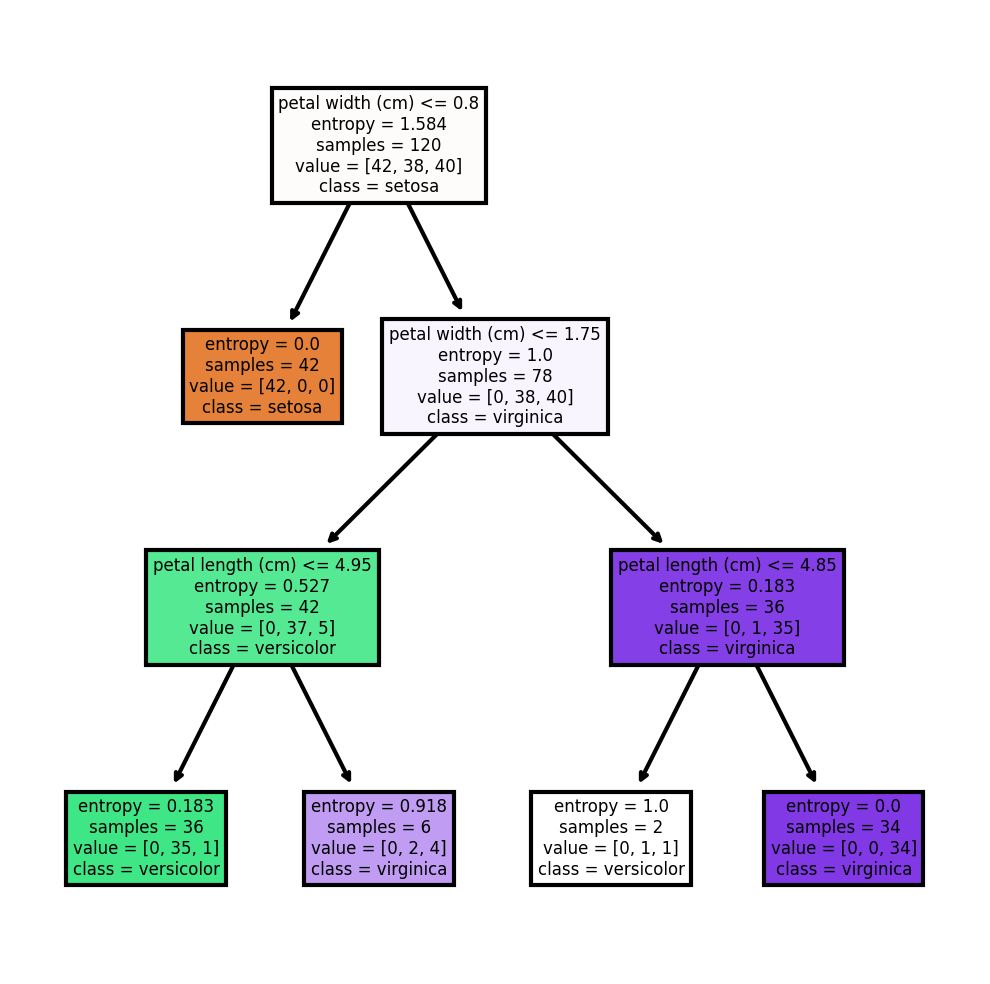

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
#0 label = Setosa
#1 label = Versicolor
#2 label = Virginica

#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    13
2     9
0     8
dtype: int64

In [ ]:
preds

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species1,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [ ]:
# Accuracy
np.mean(preds==y_test)

0.9666666666666667

### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

In [ ]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

## Running the Decision Tree Classifier on Whole Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_entropy.fit(x, y)
#Prediction and computing the accuracy
preds=model_entropy.predict(x)
np.mean(preds==y)

In [ ]:
pd.crosstab(y,preds)

# Decision Tree Regression Example

In [4]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#X[0]='Sepal.Length'
#X[1]='Sepal.Width'
#X[2]='Petal.Length'
#X[3]='Petal.Width'

In [5]:
array = iris.values
array
X = array[:,0:3]
Y = array[:,3]

In [6]:
#Sepal.Length, Sepal.Width, Petal.Length - Independent Variables
X

array([[5.1, 3.5, 1.4],
       [4.9, 3.0, 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5.0, 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5.0, 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3.0, 1.4],
       [4.3, 3.0, 1.1],
       [5.8, 4.0, 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1.0],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5.0, 3.0, 1.6],
       [5.0, 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5.0, 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3.0, 1.3],
       [5.1, 3.4, 1.5],
       [5.0, 3.5, 1.3],
       [4.5, 2.3

In [7]:
#Petal Width - Dependent Variable
Y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3,
       1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8], dtype=object)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 3)
(45, 3)
(105,)
(45,)


In [10]:
model = DecisionTreeRegressor(criterion='squared_error')
#model = DecisionTreeRegressor(criterion='poisson')
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [11]:
model.score(X_train, Y_train)

0.9983534700339013

In [12]:
#Find the accuracy
model.score(X_test,Y_test)

0.8665027226418408

In [ ]:
import pandas as pd

In [ ]:
tax={'Refund':['Yes','No','No','Yes','No','No','Yes','No','No','No'],
     'Marital_Status':['Single','Married','Single','Married','Divorced','Married','Divorced','Single','Married','Single'],
     'Taxable_Income':[125000,100000,70000,120000,95000,60000,220000,85000,75000,90000],
     'Cheat':['No','No','No','No','Yes','No','No','Yes','No','Yes']}
tax_df=pd.DataFrame(tax)
tax_df

,Refund,Marital_Status,Taxable_Income,Cheat
0,Yes,Single,125000,No
1,No,Married,100000,No
2,No,Single,70000,No
3,Yes,Married,120000,No
4,No,Divorced,95000,Yes
5,No,Married,60000,No
6,Yes,Divorced,220000,No
7,No,Single,85000,Yes
8,No,Married,75000,No
9,No,Single,90000,Yes


In [ ]:
#Terminal Node
Node_1=tax_df[tax_df['Refund']=='Yes']
Node_1

,Refund,Marital_Status,Taxable_Income,Cheat
0,Yes,Single,125000,No
3,Yes,Married,120000,No
6,Yes,Divorced,220000,No


In [ ]:
Node_2=tax_df[tax_df['Refund']=='No']
Node_2

,Refund,Marital_Status,Taxable_Income,Cheat
1,No,Married,100000,No
2,No,Single,70000,No
4,No,Divorced,95000,Yes
5,No,Married,60000,No
7,No,Single,85000,Yes
8,No,Married,75000,No
9,No,Single,90000,Yes


In [ ]:
#Terminal Node
Node_3=Node_2[Node_2['Marital_Status']=='Married']
Node_3

,Refund,Marital_Status,Taxable_Income,Cheat
1,No,Married,100000,No
5,No,Married,60000,No
8,No,Married,75000,No


In [ ]:
Node_4=Node_2[Node_2['Marital_Status']!='Married']
Node_4

,Refund,Marital_Status,Taxable_Income,Cheat
2,No,Single,70000,No
4,No,Divorced,95000,Yes
7,No,Single,85000,Yes
9,No,Single,90000,Yes


In [ ]:
#Terminal Node
Node_5=Node_4[Node_4['Taxable_Income']>=80000]
Node_5

,Refund,Marital_Status,Taxable_Income,Cheat
4,No,Divorced,95000,Yes
7,No,Single,85000,Yes
9,No,Single,90000,Yes


In [ ]:
#Terminal Node
Node_5=Node_4[Node_4['Taxable_Income']<80000]
Node_5

,Refund,Marital_Status,Taxable_Income,Cheat
2,No,Single,70000,No


In [ ]:
df=tax_df
label_encoder = preprocessing.LabelEncoder()
df['Refund']= label_encoder.fit_transform(df['Refund'])
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])
df['Cheat']= label_encoder.fit_transform(df['Cheat'])
df

,Refund,Marital_Status,Taxable_Income,Cheat
0,1,2,125000,0
1,0,1,100000,0
2,0,2,70000,0
3,1,1,120000,0
4,0,0,95000,1
5,0,1,60000,0
6,1,0,220000,0
7,0,2,85000,1
8,0,1,75000,0
9,0,2,90000,1


In [ ]:
x=df.iloc[:,:3]
y=df.iloc[:,3]

In [ ]:
x

,Refund,Marital_Status,Taxable_Income
0,1,2,125000
1,0,1,100000
2,0,2,70000
3,1,1,120000
4,0,0,95000
5,0,1,60000
6,1,0,220000
7,0,2,85000
8,0,1,75000
9,0,2,90000


In [ ]:
y

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Cheat, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x, y)

DecisionTreeClassifier(max_depth=3)

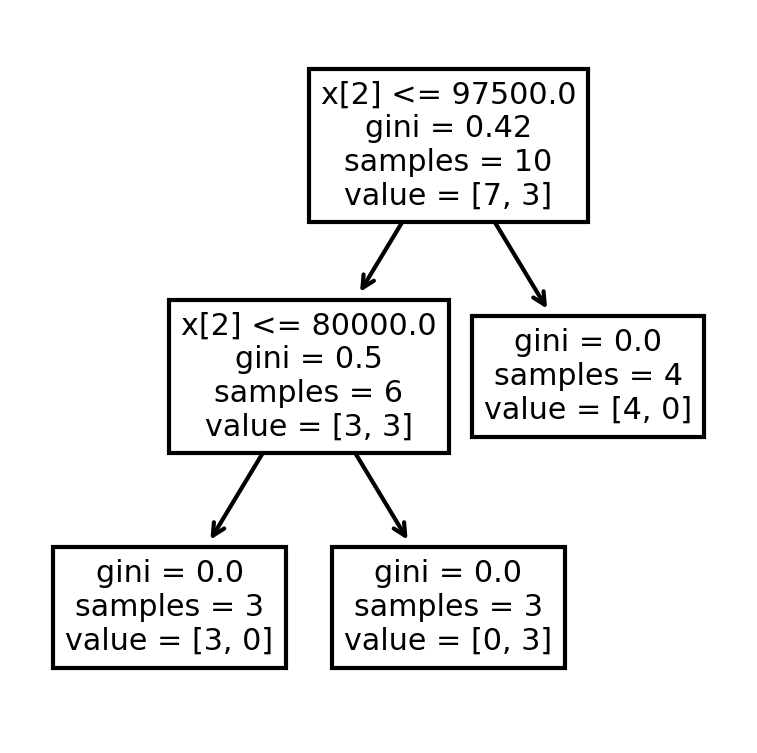

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
#Plot the decision tree
tree.plot_tree(model);

In [ ]:
df

,Refund,Marital_Status,Taxable_Income,Cheat
0,1,2,125000,0
1,0,1,100000,0
2,0,2,70000,0
3,1,1,120000,0
4,0,0,95000,1
5,0,1,60000,0
6,1,0,220000,0
7,0,2,85000,1
8,0,1,75000,0
9,0,2,90000,1


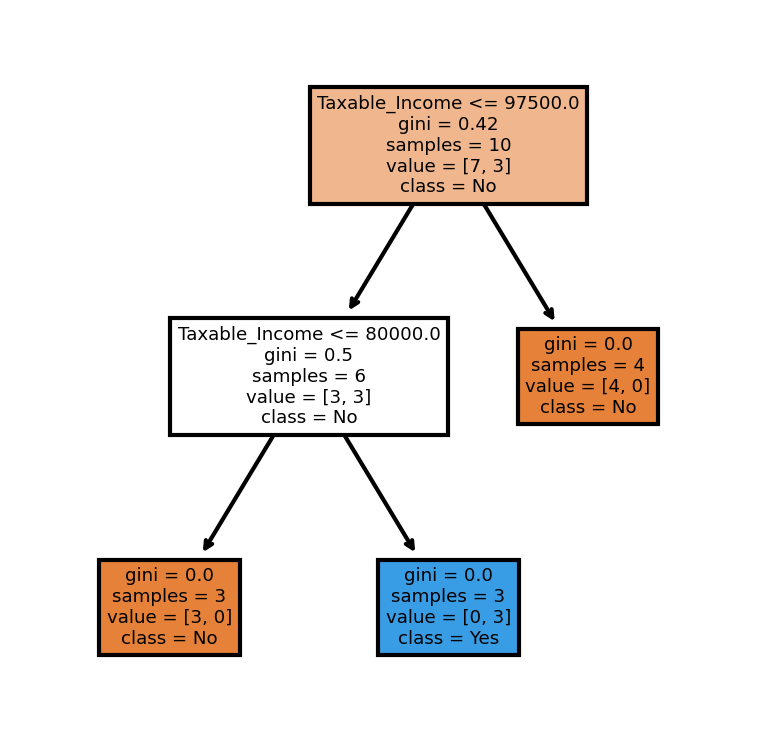

In [ ]:
fn=['Refund','Marital_Status','Taxable_Income']
cn=['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)    #dpi= dots per inch
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

# Calculation of Gini

In [ ]:
Reds = 10
Blues = 10
# Proportion of Reds = 10/20 = 0.5
# Proportion of Blues = 10/20 = 0.5
Prop_Reds = Reds/(Reds + Blues)
Prop_Blues = Blues/(Reds + Blues)
print("Proportion of Reds is ",Prop_Reds)
print("Proportion of Reds is ",Prop_Blues)
Root_Node_Gini= Prop_Reds**2 + Prop_Blues**2
print("Gini score of root node is ", Root_Node_Gini)

In [ ]:
#Node 1
Reds = 2
Blues = 0
Prop_Reds = Reds/(Reds + Blues)
Prop_Blues = Blues/(Reds + Blues)
print("Proportion of Reds is ",Prop_Reds)
print("Proportion of Reds is ",Prop_Blues)
Node1_Gini= Prop_Reds**2 + Prop_Blues**2
print("Gini score of node 1 is ", Node1_Gini)

In [ ]:
#Node 2
Reds = 8
Blues = 10
Prop_Reds = Reds/(Reds + Blues)
Prop_Blues = Blues/(Reds + Blues)
print("Proportion of Reds is ",Prop_Reds)
print("Proportion of Reds is ",Prop_Blues)
Node2_Gini= Prop_Reds**2 + Prop_Blues**2
print("Gini score of node 2 is ", Node2_Gini)

In [ ]:
#Node 3
Reds = 8
Blues = 2
Prop_Reds = Reds/(Reds + Blues)
Prop_Blues = Blues/(Reds + Blues)
print("Proportion of Reds is ",Prop_Reds)
print("Proportion of Reds is ",Prop_Blues)
Node3_Gini= Prop_Reds**2 + Prop_Blues**2
print("Gini score of node 2 is ", Node3_Gini)

In [ ]:
#Node 4
Reds = 2
Blues = 8
Prop_Reds = Reds/(Reds + Blues)
Prop_Blues = Blues/(Reds + Blues)
print("Proportion of Reds is ",Prop_Reds)
print("Proportion of Reds is ",Prop_Blues)
Node4_Gini= Prop_Reds**2 + Prop_Blues**2
print("Gini score of node 2 is ", Node4_Gini)

In [ ]:
print('Gini score for the 1st split',(Node1_Gini*2/20)+(Node2_Gini*18/20))
print('Gini score for the 2nd split',(Node3_Gini*10/20)+(Node4_Gini*10/20))

In [ ]:
prob_red = 10/20
prob_blue = 10/20
print('Proportion of red is',prob_red)
print('Proportion of blue is',prob_blue)
Root_Node_Entropy = -1*(prob_red*math.log2(prob_red) + prob_blue*math.log2(prob_blue))
print('Entropy score of root node is',Root_Node_Entropy)

# Calculation of Entropy

In [ ]:
import math

In [ ]:
Reds = 10
Blues = 10
# Proportion of Reds = 10/20 = 0.5
# Proportion of Blues = 10/20 = 0.5
Prop_Reds = Reds/(Reds + Blues)
Prop_Blues = Blues/(Reds + Blues)
print("Proportion of Reds is ",Prop_Reds)
print("Proportion of Reds is ",Prop_Blues)
Root_Node_Entropy = (-1)*(Prop_Reds*math.log2(Prop_Reds) + Prop_Blues*math.log2(Prop_Blues))
print('Entropy score of root node is',Root_Node_Entropy)

# Activity
- Create the dataset given in Excel
- Run the DecisionTreeRegression algorithm on the data keeping price as independent variable & Review Ratings as dependent variable.
- Find the cut of points where price is split.

In [ ]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

# print the dataset
print(dataset)

In [ ]:
# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int)

# print X
print(X)

In [ ]:
# select all rows by : and column 2
# by 2 to Y representing labels
y = dataset[:, 2].astype(int)

# print y
print(y)

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, y)

In [ ]:
# predicting a new value

# test the output by changing values, like 3750
y_pred = regressor.predict([[3750]])

# print the predicted price
print("Predicted price: % d\n"% y_pred)

In [ ]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1))

# scatter plot for original data
plt.scatter(X, y, color = 'red')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)')

# specify X axis label
plt.xlabel('Production Cost')

# specify Y axis label
plt.ylabel('Profit')

# show the plot
plt.show()

In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['Production Cost'])

In [ ]:
# import some data to play with
#from sklearn.datasets import load_iris
#iris = load_iris()
#iris
#list(iris.target_names)
#'index_col' argument sets the column number defined as the index of the data.
#In this case, index_col=0 will set the Sepal.Length column as the index.
#iris = pd.read_csv('D:\\ExcelR Content\\Datasets\\iris.csv',index_col=0)

#iris = pd.read_csv('iris.csv')

In [14]:
import pandas as pd
df=pd.DataFrame()
df['Price']= [10,11,12,13,14,15,17.5,18,18.5,19,21,22,23,24,25,28,29,30,31,31]
df['Ratings']= [10,10,10,10,13,20,35,44,52,55,80,83,83,83,85,100,100,100,100,100]
df

,Price,Ratings
0,10.0,10
1,11.0,10
2,12.0,10
3,13.0,10
4,14.0,13
5,15.0,20
6,17.5,35
7,18.0,44
8,18.5,52
9,19.0,55


In [18]:
X= df['Price']
X= np.array(X).reshape(-1,1)
Y= df['Ratings']
model = DecisionTreeRegressor(criterion='squared_error', max_depth=2)
#model = DecisionTreeRegressor(criterion='poisson')
model.fit(X, Y)
model.score(X,Y)

0.9868018429302301

[Text(0.5, 0.8333333333333334, 'x[0] <= 20.0\nsquared_error = 1267.728\nsamples = 20\nvalue = 58.65'),
 Text(0.25, 0.5, 'x[0] <= 16.25\nsquared_error = 315.09\nsamples = 10\nvalue = 25.9'),
 Text(0.125, 0.16666666666666666, 'squared_error = 13.472\nsamples = 6\nvalue = 12.167'),
 Text(0.375, 0.16666666666666666, 'squared_error = 60.25\nsamples = 4\nvalue = 46.5'),
 Text(0.75, 0.5, 'x[0] <= 26.5\nsquared_error = 75.24\nsamples = 10\nvalue = 91.4'),
 Text(0.625, 0.16666666666666666, 'squared_error = 2.56\nsamples = 5\nvalue = 82.8'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 5\nvalue = 100.0')]

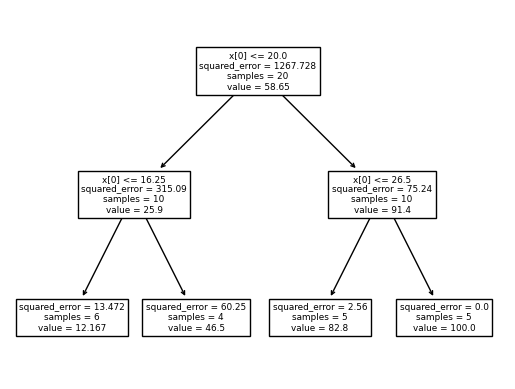

In [19]:
tree.plot_tree(model)